In [1]:
import xarray as xr
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

In [2]:
ds_p = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-precipitation_ymon.nc")

In [3]:
ds_t_avg = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-temperature-ymon.nc")

In [4]:
ds_t_std = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-t2m_ymonstd.nc")

In [5]:
lons, lats = np.meshgrid(ds_p.lon, ds_p.lat)

In [7]:
psr = xr.open_dataset('../../data/finland/mescan_surfex_pine_spruce_ratio_finland.nc')

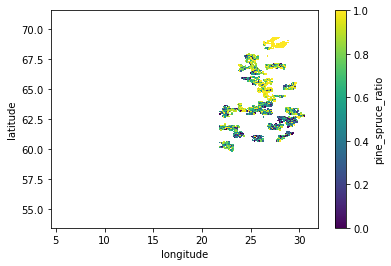

In [9]:
psr.pine_spruce_ratio.plot()

In [10]:
data = {
    'ratio': psr.pine_spruce_ratio.values.ravel()
}

In [11]:
for m in range(0, 12):
    data["p%02d" % (m + 1)] = ds_p.tp[m,:,:].values.ravel()
    data["tavg%02d" % (m + 1)] = ds_t_avg['2t'][m,:,:].values.ravel()
    data["tstd%02d" % (m + 1)] = ds_t_std['2t'][m,:,:].values.ravel()

In [12]:
df = pd.DataFrame(data)
df.dropna(inplace=True)
df

,ratio,p01,tavg01,tstd01,p02,tavg02,tstd02,p03,tavg03,tstd03,...,tstd09,p10,tavg10,tstd10,p11,tavg11,tstd11,p12,tavg12,tstd12
15077,1.000000,660.825439,-4.620933,9.170404,639.958435,-4.786113,9.532152,517.462830,-0.394080,8.394402,...,7.922419,915.495667,6.587289,7.901127,747.676941,2.214253,7.811628,641.736816,-2.333466,8.532434
15080,1.000000,674.409485,-4.997684,9.353757,647.539185,-5.165199,9.746196,514.158752,-0.604901,8.566410,...,8.027463,930.023926,6.332623,7.983202,752.917175,1.975175,7.908176,638.393677,-2.669201,8.712324
15084,1.000000,677.974670,-4.997828,9.373931,657.543701,-5.200165,9.783366,510.351654,-0.542342,8.552111,...,8.041897,937.761963,6.380342,7.997134,761.210144,1.980339,7.928543,640.134888,-2.690726,8.751489
15085,1.000000,681.675049,-5.024441,9.392144,660.282043,-5.239011,9.815116,512.901367,-0.546562,8.562280,...,8.055657,943.742676,6.372000,8.007704,769.900085,1.968346,7.939785,644.729370,-2.714171,8.766814
15406,1.000000,656.744568,-4.762714,9.280407,636.545715,-4.895281,9.656478,520.194580,-0.409214,8.419991,...,7.964809,910.643616,6.511571,7.946278,753.656738,2.167746,7.847420,639.137939,-2.445217,8.633238
15407,1.000000,661.061218,-4.898215,9.340550,638.265015,-5.042068,9.730332,518.280701,-0.506285,8.497011,...,8.015981,916.350342,6.413179,7.977532,753.378784,2.075017,7.884040,636.414734,-2.561043,8.686971
15408,1.000000,663.499268,-4.963042,9.375944,639.112915,-5.131157,9.775617,513.767029,-0.565376,8.550182,...,8.045048,917.033325,6.370415,7.989585,752.013611,2.028459,7.906059,633.016541,-2.615763,8.717731
15411,1.000000,669.687988,-4.972569,9.387925,644.556335,-5.192676,9.792516,505.363739,-0.565841,8.567245,...,8.035131,919.994507,6.390189,7.983197,754.940125,2.006159,7.918529,631.827576,-2.644104,8.746675
15413,1.000000,673.699707,-5.001856,9.394066,648.966492,-5.237514,9.809903,503.877075,-0.559904,8.561532,...,8.038685,925.554932,6.378062,7.991883,763.192871,1.980292,7.928274,635.565979,-2.684593,8.761654
15734,1.000000,653.136780,-4.886075,9.354346,634.530151,-5.020950,9.760453,525.229614,-0.489660,8.445697,...,7.976248,897.833374,6.438836,7.967750,760.616211,2.128262,7.863558,641.785339,-2.525800,8.692646


In [13]:
df = df[df["ratio"] > 0]
df.head()

,ratio,p01,tavg01,tstd01,p02,tavg02,tstd02,p03,tavg03,tstd03,...,tstd09,p10,tavg10,tstd10,p11,tavg11,tstd11,p12,tavg12,tstd12
15077,1.0,660.825439,-4.620933,9.170404,639.958435,-4.786113,9.532152,517.462830,-0.394080,8.394402,...,7.922419,915.495667,6.587289,7.901127,747.676941,2.214253,7.811628,641.736816,-2.333466,8.532434
15080,1.0,674.409485,-4.997684,9.353757,647.539185,-5.165199,9.746196,514.158752,-0.604901,8.566410,...,8.027463,930.023926,6.332623,7.983202,752.917175,1.975175,7.908176,638.393677,-2.669201,8.712324
15084,1.0,677.974670,-4.997828,9.373931,657.543701,-5.200165,9.783366,510.351654,-0.542342,8.552111,...,8.041897,937.761963,6.380342,7.997134,761.210144,1.980339,7.928543,640.134888,-2.690726,8.751489
15085,1.0,681.675049,-5.024441,9.392144,660.282043,-5.239011,9.815116,512.901367,-0.546562,8.562280,...,8.055657,943.742676,6.372000,8.007704,769.900085,1.968346,7.939785,644.729370,-2.714171,8.766814
15406,1.0,656.744568,-4.762714,9.280407,636.545715,-4.895281,9.656478,520.194580,-0.409214,8.419991,...,7.964809,910.643616,6.511571,7.946278,753.656738,2.167746,7.847420,639.137939,-2.445217,8.633238


In [14]:
df.columns[1:]

Index(['p01', 'tavg01', 'tstd01', 'p02', 'tavg02', 'tstd02', 'p03', 'tavg03',
       'tstd03', 'p04', 'tavg04', 'tstd04', 'p05', 'tavg05', 'tstd05', 'p06',
       'tavg06', 'tstd06', 'p07', 'tavg07', 'tstd07', 'p08', 'tavg08',
       'tstd08', 'p09', 'tavg09', 'tstd09', 'p10', 'tavg10', 'tstd10', 'p11',
       'tavg11', 'tstd11', 'p12', 'tavg12', 'tstd12'],
      dtype='object')

In [15]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [17]:
X_train

,p01,tavg01,tstd01,p02,tavg02,tstd02,p03,tavg03,tstd03,p04,...,tstd09,p10,tavg10,tstd10,p11,tavg11,tstd11,p12,tavg12,tstd12
44674,694.270264,-2.055081,7.725312,470.969727,-3.867918,8.281524,440.295654,-1.550310,7.270207,402.593994,...,7.146236,1076.461182,8.279758,7.326593,1088.944580,3.850660,7.513080,801.961243,0.210376,7.917199
40076,590.817749,-3.692287,8.562220,412.141205,-4.814979,8.969278,462.975098,-1.561896,7.859692,323.348145,...,7.457263,939.885010,6.984876,7.628710,872.523315,2.354268,7.721951,612.602234,-1.574328,8.445937
56560,670.817017,-7.204673,9.273395,505.437408,-8.626756,9.949608,483.280731,-3.882206,8.195897,361.469360,...,7.559573,967.936523,4.596916,7.691267,894.859924,-0.190085,7.952592,812.902832,-4.792439,9.368559
75225,277.777069,-3.360077,7.828124,214.122177,-5.965026,8.326704,220.393677,-3.566085,7.512247,364.966278,...,7.064958,639.469055,6.346716,7.143617,454.077515,2.254809,7.383867,498.471649,-0.594800,7.613622
39738,685.633362,-4.673964,9.049074,466.728241,-5.610439,9.633399,549.810303,-1.969755,8.389660,448.475494,...,7.850059,1006.096802,5.878627,7.952565,938.260925,1.399327,7.960950,731.053284,-2.588983,8.809680
65684,489.183502,-4.355490,8.418307,401.247223,-6.073141,9.186112,362.003632,-2.899092,7.828233,399.035706,...,7.347799,847.090881,6.018839,7.461690,697.657532,1.622539,7.843249,732.497131,-2.130170,8.599002
39068,773.796265,-4.239671,9.017686,489.196960,-5.156039,9.537460,562.656677,-1.809193,8.473820,499.142548,...,7.892447,1108.912231,6.114506,7.966738,1089.488770,1.742747,7.992061,875.249023,-2.033004,8.765611
64436,777.290039,-8.716303,10.026752,613.166077,-9.418794,10.721650,537.897217,-5.037488,9.174524,500.354889,...,7.864419,942.030029,3.613502,7.943185,981.565796,-1.371701,8.480136,970.663269,-6.211038,10.202116
64110,746.738281,-8.608466,10.074744,584.313660,-9.303361,10.770782,525.665833,-4.842763,9.165610,480.324371,...,7.851755,908.235107,3.854069,7.926334,949.979187,-1.164786,8.468577,922.857910,-6.064366,10.219748
20021,459.086731,-5.295030,9.460931,433.226471,-5.573797,9.875930,408.274200,-0.830144,8.495631,479.366730,...,8.075089,722.449463,6.131320,8.000367,619.979736,1.601606,7.980926,437.139648,-2.937354,8.809432


In [18]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [19]:
y_pred = rf.predict(X_test)

In [20]:
mean_squared_error(y_test, y_pred)

0.054044350384687176

In [21]:
r2_score(y_test, y_pred)

0.3147269807401417

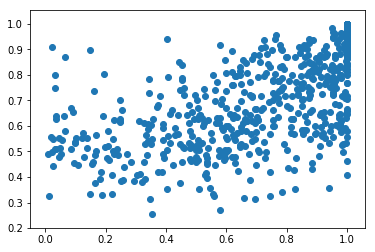

In [22]:
plt.scatter(y_test, y_pred)

In [23]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [24]:
df_results

,observed,predicted
70363,0.855260,0.576138
61817,0.350220,0.530911
16720,1.000000,0.927602
34475,0.580912,0.918184
75219,0.851743,0.584105
30883,0.978658,0.800121
30215,0.600491,0.671819
31213,0.977743,0.800629
71982,0.342069,0.540247
55861,0.974907,0.593821


In [25]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)  

In [26]:
feature_importances

,importance
tavg03,0.092991
tavg02,0.077133
tavg08,0.054630
p10,0.051565
p12,0.046342
tavg04,0.038105
p06,0.033171
p09,0.032011
p07,0.030740
tavg07,0.030156


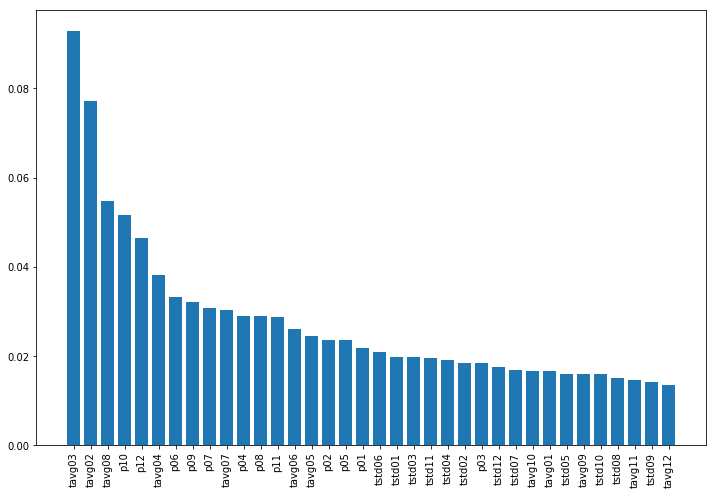

In [27]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()